# MCSE : Datathon

Archishman VB (TA-MCSE)

# Datathon


Consider a scenario where a researcher is studying the trends and patterns in diabetes prevalence and its influencing factors within a particular population. They gather a detailed dataset, encompassing individual demographics, lifestyle habits, genetic tendencies, medical histories, and metrics such as glucose levels and insulin production. The objective is to analyze this extensive data to uncover correlations among variables and understand the factors contributing to diabetes onset. By employing advanced analytical methods, including machine learning algorithms, the researcher aims to identify potential risk factors, evaluate the success of current prevention strategies, and provide valuable insights to support the development of targeted interventions, ultimately enhancing public health efforts to combat diabetes.



The dataset comprises information on 768 individuals, including the number of pregnancies,
glucose levels, blood pressure, skin thickness, insulin levels, body mass index (BMI), a
diabetes pedigree function reflecting genetic influence, age, and an outcome variable
indicating the presence (1) or absence (0) of diabetes

1. Pregnancies: Number of times pregnant.
2. Glucose: Plasma glucose concentration after 2 hours in an oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Triceps skinfold thickness (mm).
5. Insulin: 2-Hour serum insulin (mu U/ml).
6. BMI: Body mass index (weight in kg/(height in m)^2).
7. DiabetesPedigreeFunction: Diabetes pedigree function, a measure of the diabetes
genetic influence.
8. Age: Age in years.
9. Outcome: Binary variable indicating whether a person has diabetes (1) or not (0).

# Questions:-

1. Classify the features in the Diabetes dataset into their appropriate data types (ordinal,
nominal, interval, or ratio). Provide a rationale for each classification.
2. A summary statistic provides a numerical summary of a specific feature within the dataset.
There are two commonly used categories of summary statistics: those that indicate the
central tendency and those that indicate the spread of the data. Identify the most appropriate
measure of central tendency for each attribute in the dataset and state its corresponding
value. Additionally, calculate the standard deviation and range of values for each column.
3. Identify and describe any data quality issues or inconsistencies within the Diabetes dataset.
What steps would you take to clean and preprocess the data to ensure its accuracy and
reliability for further analysis?
4. Using a histogram and box plot, assess the presence of outliers in the 'Age' and
'DiabetesPedigreeFunction' variables. Describe the visualisations, identify any potential
outliers, and explain how you determined their presence or absence.
5. What actions would you take to resolve the presence of outliers? Visualise the changes.
Hint: Use boxplot and histogram
6. Examine the normal probability plot (Q-Q plot) for the 'DiabetesPedigreeFunction' variable
in the Diabetes dataset. Based on the shape and trend of the plot, what conclusions can be
drawn? Provide a rationale for your conclusions.
7. Calculate the correlation between age and other numerical variables (e.g., Pregnancies or
BloodPressure). Set a correlation threshold and create a heatmap to visualise the
relationships.
8. Generate a pairplot that includes the variables 'Age’, ‘DiabetesPedigreeFunction', and
'Pregnancies' while using 'Outcome' as the hue in the dataset. What insights can be gained
from the pairplot, and how does it help in visualising the relationships between the given
features and if someone is diabetic or not?
9. Is there a significant difference in the mean glucose levels between individuals with
diabetes (Outcome = 1) and those without diabetes (Outcome = 0)?Formulate null and
alternative hypotheses and employ a T-test to examine this relationship.Plot a histogram to
visualise the results. Assume significance level as 0.05.
10. Calculate the margin of error to quantify the precision of the analysis done previously and
what you can infer from the results.
11. Perform a linear regression to predict 'DiabetesPedigreeFunction' using 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'. Validate the model using performance metrics like MSE and R-squared value.


In [3]:
import pandas as pd
import numpy as np

diabetes_data = pd.read_csv('diabetes.csv')

In [25]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# 1

data_types = {
 'Pregnancies': 'Ordinal',
 'Glucose': 'Ratio',
 'BloodPressure': 'Ratio',
 'SkinThickness': 'Ratio',
 'Insulin': 'Ratio',
 'BMI': 'Ratio',
 'DiabetesPedigreeFunction': 'Ratio',
 'Age': 'Ratio',
 'Outcome': 'Nominal'
}

data_types

{'Pregnancies': 'Ordinal',
 'Glucose': 'Ratio',
 'BloodPressure': 'Ratio',
 'SkinThickness': 'Ratio',
 'Insulin': 'Ratio',
 'BMI': 'Ratio',
 'DiabetesPedigreeFunction': 'Ratio',
 'Age': 'Ratio',
 'Outcome': 'Nominal'}

In [7]:
# 2

# Import necessary libraries
import pandas as pd

# Calculating summary statistics for each numerical column
numerical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
summary_stats = {}

for col in numerical_columns:
    summary_stats[col] = {
        'Mean': diabetes_data[col].mean(skipna=True),
        'Median': diabetes_data[col].median(skipna=True),
        'Standard Deviation': diabetes_data[col].std(skipna=True),
        'Range': diabetes_data[col].max(skipna=True) - diabetes_data[col].min(skipna=True)
    }

# Display summary statistics
summary_stats

{'Glucose': {'Mean': 120.89453125,
  'Median': 117.0,
  'Standard Deviation': 31.97261819513622,
  'Range': 199},
 'BloodPressure': {'Mean': 69.10546875,
  'Median': 72.0,
  'Standard Deviation': 19.355807170644777,
  'Range': 122},
 'SkinThickness': {'Mean': 20.536458333333332,
  'Median': 23.0,
  'Standard Deviation': 15.952217567727677,
  'Range': 99},
 'Insulin': {'Mean': 79.79947916666667,
  'Median': 30.5,
  'Standard Deviation': 115.24400235133837,
  'Range': 846},
 'BMI': {'Mean': 31.992578124999998,
  'Median': 32.0,
  'Standard Deviation': 7.8841603203754405,
  'Range': 67.1},
 'DiabetesPedigreeFunction': {'Mean': 0.47187630208333325,
  'Median': 0.3725,
  'Standard Deviation': 0.33132859501277484,
  'Range': 2.342},
 'Age': {'Mean': 33.240885416666664,
  'Median': 29.0,
  'Standard Deviation': 11.76023154067868,
  'Range': 60}}

In [8]:
# 3

# Identifying missing values in each column
missing_values = diabetes_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


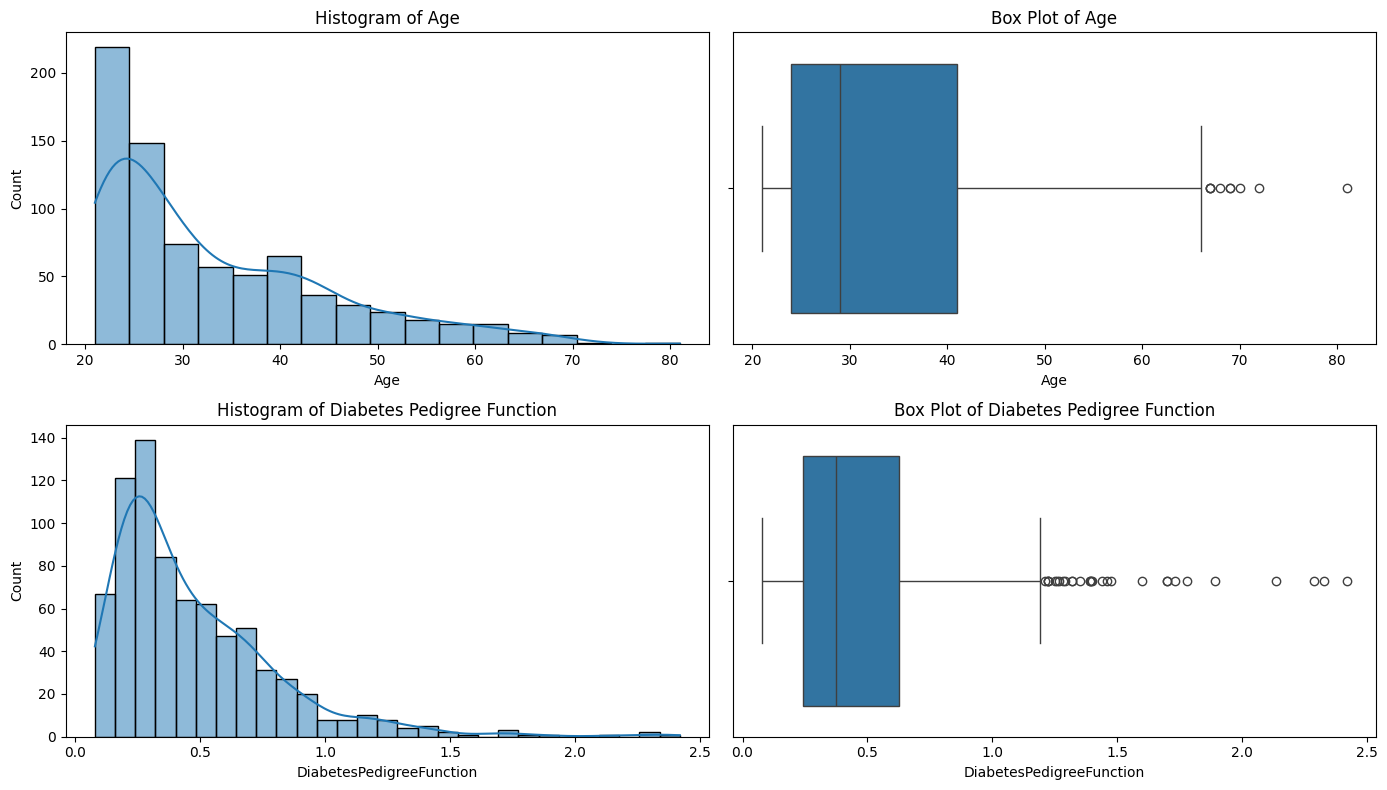

In [10]:
# 4

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
plt.figure(figsize=(14, 8))

# Histogram and box plot for Age
plt.subplot(2, 2, 1)
sns.histplot(diabetes_data['Age'], kde=True)
plt.title('Histogram of Age')

plt.subplot(2, 2, 2)
sns.boxplot(x=diabetes_data['Age'])
plt.title('Box Plot of Age')

# Histogram and box plot for DiabetesPedigreeFunction
plt.subplot(2, 2, 3)
sns.histplot(diabetes_data['DiabetesPedigreeFunction'], kde=True)
plt.title('Histogram of Diabetes Pedigree Function')

plt.subplot(2, 2, 4)
sns.boxplot(x=diabetes_data['DiabetesPedigreeFunction'])
plt.title('Box Plot of Diabetes Pedigree Function')

plt.tight_layout()
plt.show()


# To address outliers, common strategies include:

# Capping: Limiting extreme values to a specified percentile (e.g., 95th percentile).
# Removing Outliers: Dropping values outside a certain range.

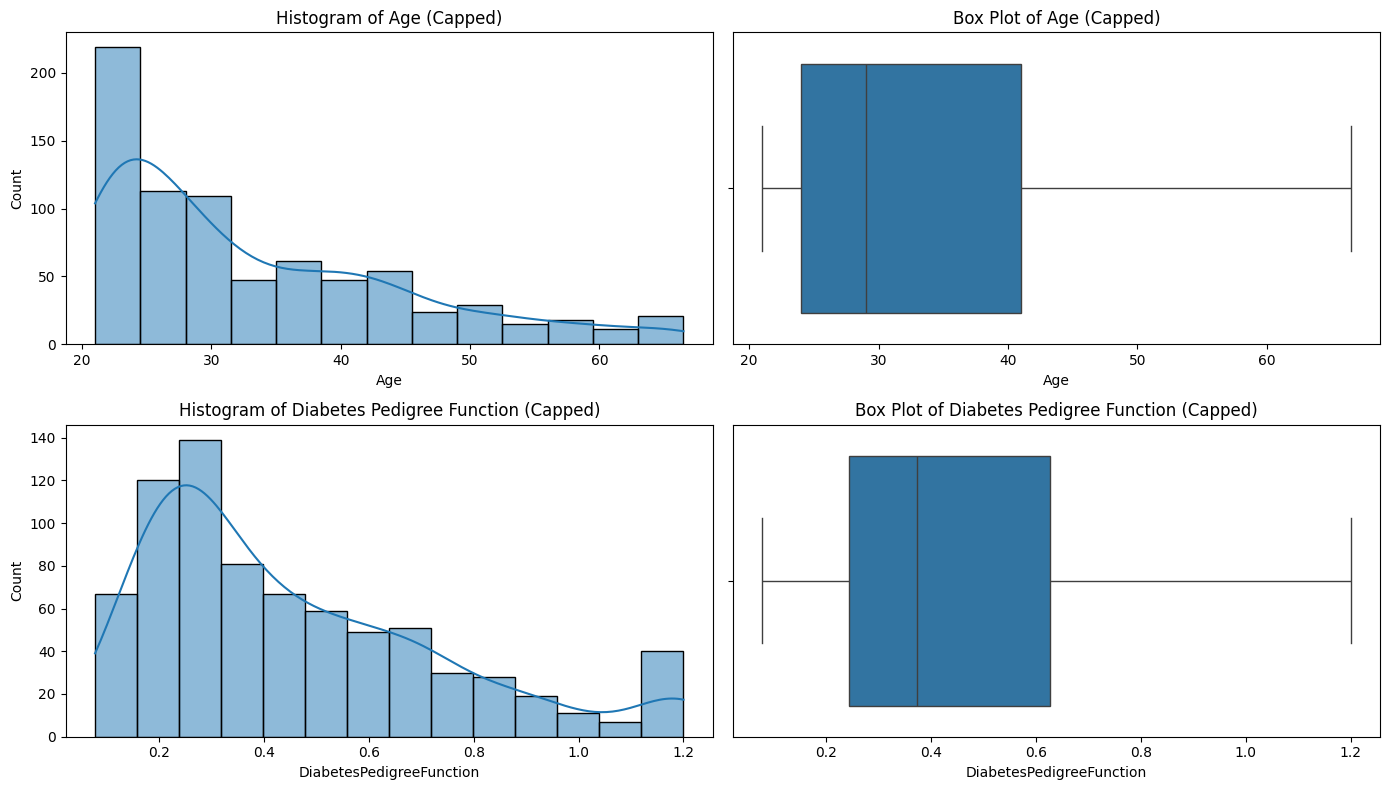

In [11]:
# 5

# One common method to handle outliers is by applying a capping technique, where outliers beyond a certain threshold (e.g., 1.5 * IQR) are capped at a specified value.
#  We’ll cap outliers for Age and DiabetesPedigreeFunction and then visualize the changes with updated box plots and histograms.

import numpy as np

# Define a function to cap outliers using the 1.5*IQR rule
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))

# Apply capping on Age and DiabetesPedigreeFunction columns
cap_outliers(diabetes_data, 'Age')
cap_outliers(diabetes_data, 'DiabetesPedigreeFunction')

# Visualize the capped data
plt.figure(figsize=(14, 8))

# Histogram and box plot for capped Age
plt.subplot(2, 2, 1)
sns.histplot(diabetes_data['Age'], kde=True)
plt.title('Histogram of Age (Capped)')

plt.subplot(2, 2, 2)
sns.boxplot(x=diabetes_data['Age'])
plt.title('Box Plot of Age (Capped)')

# Histogram and box plot for capped DiabetesPedigreeFunction
plt.subplot(2, 2, 3)
sns.histplot(diabetes_data['DiabetesPedigreeFunction'], kde=True)
plt.title('Histogram of Diabetes Pedigree Function (Capped)')

plt.subplot(2, 2, 4)
sns.boxplot(x=diabetes_data['DiabetesPedigreeFunction'])
plt.title('Box Plot of Diabetes Pedigree Function (Capped)')

plt.tight_layout()
plt.show()


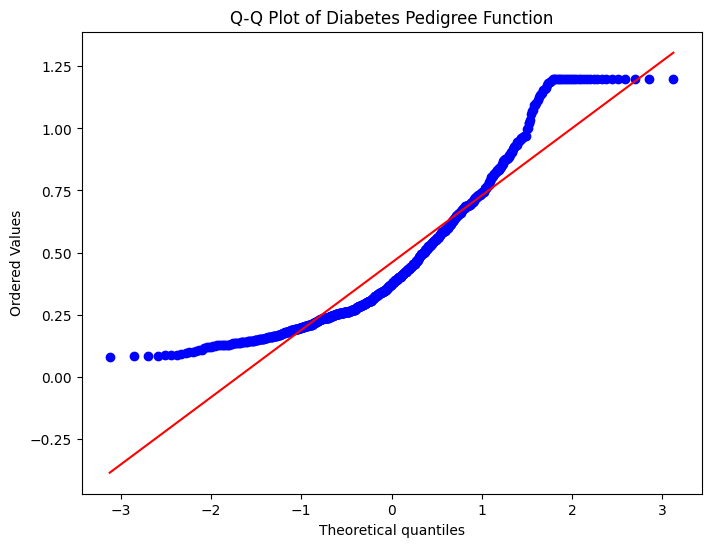

In [13]:
# 6

# A Q-Q plot is used to assess if a variable follows a normal distribution.
# We’ll create a Q-Q plot for DiabetesPedigreeFunction to examine its distribution.

import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for DiabetesPedigreeFunction
plt.figure(figsize=(8, 6))
stats.probplot(diabetes_data['DiabetesPedigreeFunction'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Diabetes Pedigree Function')
plt.show()

# If the points follow a straight line closely, DiabetesPedigreeFunction is likely normally distributed.
#  Deviations from this line suggest skewness or heavy tails.

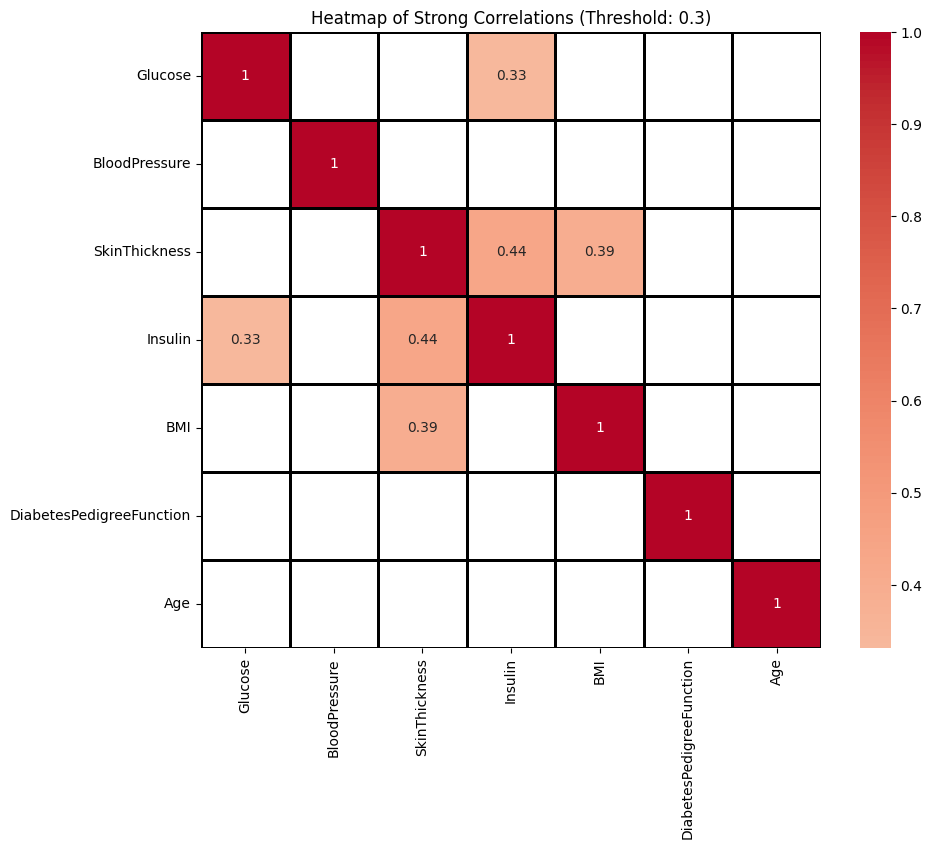

In [15]:
# 7

import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns for correlation analysis
numerical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Calculate the correlation matrix for the selected numerical columns
correlation_matrix = diabetes_data[numerical_columns].corr()

# Set a correlation threshold
correlation_threshold = 0.3

# Filter the correlation matrix to include only strong correlations based on the threshold
strong_correlations = correlation_matrix[correlation_matrix.abs() >= correlation_threshold]

# Plot heatmap of the correlation matrix for selected numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.title('Heatmap of Strong Correlations (Threshold: 0.3)')
plt.show()


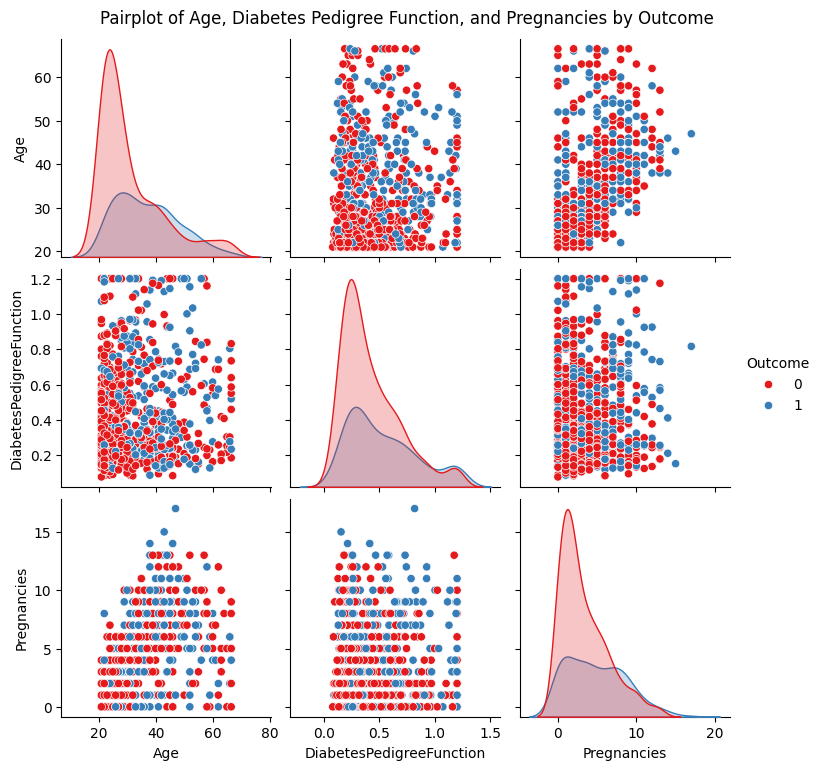

In [16]:
# 8

import seaborn as sns
import matplotlib.pyplot as plt

# Generate a pairplot for Age, DiabetesPedigreeFunction, and Pregnancies with Outcome as hue
sns.pairplot(diabetes_data, vars=['Age', 'DiabetesPedigreeFunction', 'Pregnancies'], hue='Outcome', palette="Set1", diag_kind="kde")
plt.suptitle("Pairplot of Age, Diabetes Pedigree Function, and Pregnancies by Outcome", y=1.02)
plt.show()


# The pairplot helps in visualizing the relationships between Age, DiabetesPedigreeFunction, and Pregnancies with respect to the Outcome.
# It can reveal if higher values in certain features are associated with diabetes (e.g., if older individuals or those with a higher diabetes pedigree function score are more likely to have diabetes).

In [17]:
# 9

# Null Hypothesis (H0): There is no significant difference in the mean glucose levels between individuals with diabetes and those without diabetes.
# Alternative Hypothesis (H1): There is a significant difference in the mean glucose levels between individuals with diabetes and those without diabetes.

from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Separate glucose levels based on Outcome
glucose_diabetic = diabetes_data[diabetes_data['Outcome'] == 1]['Glucose']
glucose_nondiabetic = diabetes_data[diabetes_data['Outcome'] == 0]['Glucose']

# Perform a T-test
t_stat, p_value = ttest_ind(glucose_diabetic, glucose_nondiabetic, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Check if we reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-statistic: 13.751537067396413, P-value: 2.6441613495403223e-36
Reject the null hypothesis


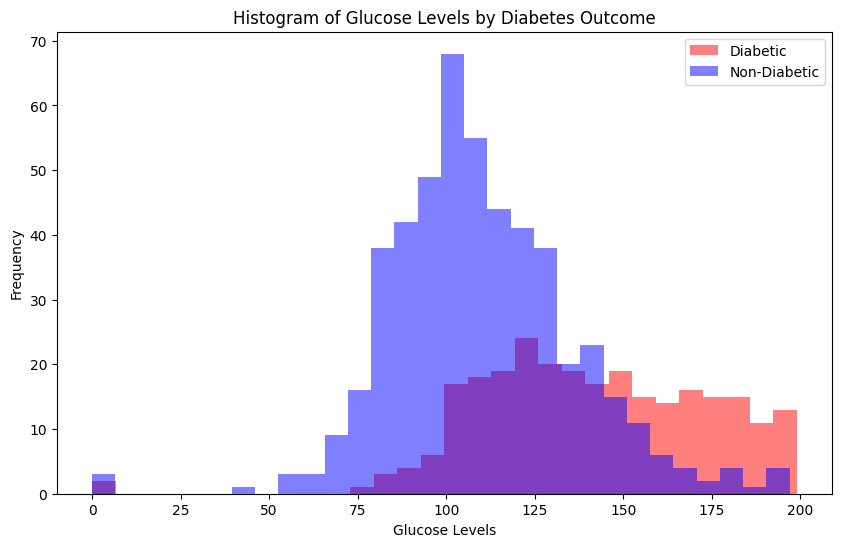

In [20]:
# Histogram for visualization
plt.figure(figsize=(10, 6))
plt.hist(glucose_diabetic, alpha=0.5, label='Diabetic', bins=30, color='red')
plt.hist(glucose_nondiabetic, alpha=0.5, label='Non-Diabetic', bins=30, color='blue')
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose Levels by Diabetes Outcome')
plt.legend()
plt.show()

In [21]:
# 10

# The margin of error (ME) can help quantify the precision of the mean difference between diabetic and non-diabetic groups.
# For a 95% confidence interval, we can calculate the margin of error for glucose levels.

import numpy as np
import scipy.stats as stats

# Calculate mean and standard deviation for each group
mean_diabetic = glucose_diabetic.mean()
std_diabetic = glucose_diabetic.std()
n_diabetic = len(glucose_diabetic)

mean_nondiabetic = glucose_nondiabetic.mean()
std_nondiabetic = glucose_nondiabetic.std()
n_nondiabetic = len(glucose_nondiabetic)

# Standard error for the difference in means
se_diff = np.sqrt((std_diabetic ** 2 / n_diabetic) + (std_nondiabetic ** 2 / n_nondiabetic))

# Margin of error for 95% confidence interval (using z-score of 1.96)
margin_of_error = 1.96 * se_diff
print(f"Margin of Error: {margin_of_error}")

# Confidence interval for the difference in means
mean_diff = mean_diabetic - mean_nondiabetic
ci_lower = mean_diff - margin_of_error
ci_upper = mean_diff + margin_of_error
print(f"95% Confidence Interval for Mean Difference: [{ci_lower}, {ci_upper}]")


# The margin of error gives us an estimate of the possible error range around the mean difference.
# The 95% confidence interval provides a range within which the true difference in mean glucose levels between diabetic and non-diabetic individuals is likely to fall.
#  If this interval does not include zero, it supports the conclusion of a significant difference.

Margin of Error: 4.457961794759449
95% Confidence Interval for Mean Difference: [26.8195008918077, 35.735424481326596]


Mean Squared Error: 0.08670047059791057
R-squared: 0.08694268503501779


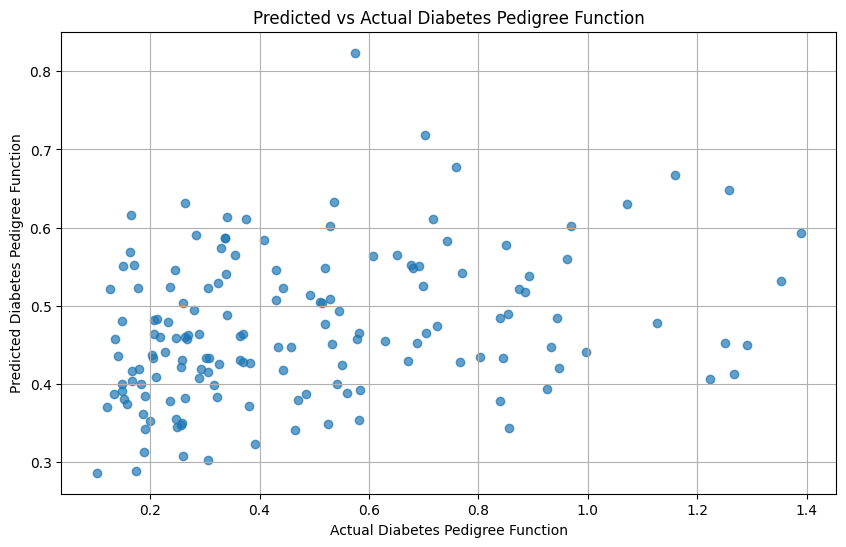

In [29]:
# 11

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
diabetes_data = pd.read_csv("diabetes.csv")  # Replace with your actual file path

# Select features and target variable
features = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness',
                          'Insulin', 'BMI', 'Age', 'Pregnancies']]  # Include more features if desired
target = diabetes_data['DiabetesPedigreeFunction']  # Change target variable

# Handling missing values (if any)
features = features.fillna(features.median())

# Scaling features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Diabetes Pedigree Function")
plt.ylabel("Predicted Diabetes Pedigree Function")
plt.title("Predicted vs Actual Diabetes Pedigree Function")
plt.grid(True)
plt.show()



# The R-squared value will indicate how well the features explain the variability in fare.
# A higher R-squared means a better fit.
# The plot of actual versus predicted values helps visualize this fit.

Based on the model you developed, think about which features might be most important in predicting the Diabetes Pedigree Function. Why do you think these features would impact the perdiction, and how might you test your hypothesis?

**Question 1**:
What additional features could be engineered from the existing data in the diabetes dataset to improve the prediction of diabetes outcomes?

**Answer**:

BMI Categories: Create a categorical feature based on BMI (e.g., underweight, normal weight, overweight, obese) to capture the impact of different weight categories on diabetes risk.

Age Groups: Classifying age into groups (e.g., 18-30, 31-40, 41-50, etc.) could help identify age-related trends in diabetes prevalence.

Glucose to Insulin Ratio: Calculating the ratio of glucose to insulin levels may help indicate insulin sensitivity, which is an important factor in diabetes.

Blood Pressure Categories: Similar to BMI, categorizing blood pressure into ranges (e.g., normal, prehypertension, hypertension) may reveal patterns related to diabetes risk.

Pregnancy History: Creating a binary feature indicating if a person has had more than a certain number of pregnancies (e.g., more than 3) could provide insights into gestational diabetes risk.


**Question 2**:
What insights could be gained from creating new categorical variables based on the existing quantitative features in the diabetes dataset?

**Answer**:

Glucose Risk Levels: Convert glucose levels into categorical variables (e.g., normal, prediabetic, diabetic) to simplify analysis and understand how different ranges affect diabetes risk.

Family History Indicator: If available, an indicator of family history of diabetes could be created, which may significantly influence the outcome.

Insulin Response: Categorize individuals based on insulin levels (e.g., low, normal, high) to explore how different insulin responses relate to diabetes.

Combined Health Risk Factors: Create a categorical variable that combines multiple risk factors (e.g., high BMI + high glucose) to assess the combined effect on diabetes risk.



